In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/googleplaystore.csv/googleplaystore.csv')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# to check if the features belong to the correct variable types if not conversion is needed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# to check for missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# to convert reviews into numeric as it is in wrong data type 'object', errors='coerce' default setting as column contain str variables
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [8]:
df['Reviews'].unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

In [9]:
# to check categories for Size
# Size contains both megaand kilo metrics
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [10]:
# to convert Megabytes or M, Kilobytes of K in 'Size into 6 or 3 zeros, need to do this step one at a time as there is 
# 'Varies with device', float64 in 'Size' column
df['Size'] = df['Size'].str.replace('M','000')
df['Size'] = df['Size'].str.replace('k','')

In [12]:
# to replace 'Varies with device' with 0 as missing variables
df['Size'] = df['Size'].replace('Varies with device','np.nan')

In [13]:
# to convert 'Size' into float, errors='coerce' is the default setting
df['Size'] = pd.to_numeric(df['Size'],errors='coerce')

In [14]:
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10841, dtype: float64

In [15]:
# in the size column, there a range of units some are in mega, some are in kilo
# to convert digits in 'Size' columns to mega units using the 'for' loop, Mega = 3 zeros
for i in df['Size']:
    if i < 10:
        df['Size']=df['Size'].replace(i,i*1000)
df['Size']=df['Size']/1000

In [16]:
# check that all units in size have been converted to mega units
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10841, dtype: float64

In [17]:
# data type for 'Size' has been converted to float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [18]:
# to check variables in 'Installs' column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [19]:
# to check variables in 'Price column'
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

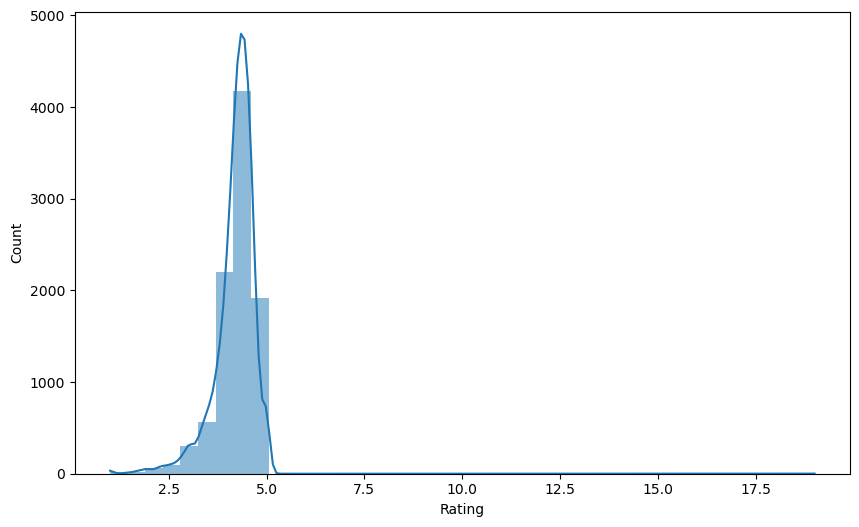

In [20]:
# to check the distribution of 'Rating' column
# figure is skewed towards the Right, mostly 4.0 to 5.0
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(df['Rating'], edgecolor='none', bins=40, kde=True)
plt.show()

In [21]:
# to remove the '+' to nothing, need to do it one step at a time as there is str value 'Free' in 'Install' column
df['Installs'] = df['Installs'].str.replace('+','')

In [22]:
# check that '+' is removed
df['Installs']

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10836         5,000
10837           100
10838         1,000
10839         1,000
10840    10,000,000
Name: Installs, Length: 10841, dtype: object

In [23]:
# to remove the ',' to nothing
df['Installs'] = df['Installs'].str.replace(',','')

In [24]:
# check that ',' is removed
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: object

In [25]:
# to remove all '$' from columns, need to do it one step at a time as there is str value 'Everyone' in 'Price column'
df['Price'] = df['Price'].str.replace('$','')

In [26]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [27]:
# to locate the outlier column where 'Installs' = Free & 'Price' = 'Everyone'
df[df['Price']=='Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,NaN,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [30]:
# to remove the outlier values columns from dataset, axis=0 to remove from column
df = df.drop(labels=10472, axis=0)

In [31]:
# to check that one row is removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


In [32]:
# to convert 'Price' into float64, do not use pd.to_numeric, float64 means that there is decimal points inside column
df['Price'] = df['Price'].astype('float')

In [33]:
df['Price'].dtypes

dtype('float64')

In [34]:
# to convert Installs, no.of installation into Integer (digits) as there is no decimal points
df['Installs'] = df['Installs'].astype('int')

In [35]:
df['Installs'].dtypes

dtype('int32')

In [36]:
# to convert 'Last Updated' into datetime columns
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [37]:
# to review the change column
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [38]:
# to extract the Year and Month of 'Last updated' columns into 2 different columns
df['Month'] = df['Last Updated'].dt.month
df['Year'] = df['Last Updated'].dt.year

In [39]:
# to remove 'Last Updated' column as no longer useful for analysis
df = df.drop('Last Updated',axis=1)

In [40]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018


In [41]:
# to check for missing values in dataset
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Current Ver          8
Android Ver          2
Month                0
Year                 0
dtype: int64

In [42]:
# to find % of missing values in each column
# 'Size' has the 15.6% missing values, Rating has 
100*(df.isnull().sum().sort_values()/len(df))

App                0.000000
Category           0.000000
Reviews            0.000000
Installs           0.000000
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Month              0.000000
Year               0.000000
Type               0.009225
Android Ver        0.018450
Current Ver        0.073801
Rating            13.597786
Size              15.636531
dtype: float64

In [43]:
# to remove all missing values as imputation of the mean to the missing values on'Rating' will result in a biased prediction model
df = df.dropna()

In [44]:
# to re-check for missing values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       0
Month             0
Year              0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7723 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   float64
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int32  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Current Ver     7723 non-null   object 
 11  Android Ver     7723 non-null   object 
 12  Month           7723 non-null   int32  
 13  Year            7723 non-null   int32  
dtypes: float64(4), int32(3), object(7)
memory usage: 814.5+ KB


In [46]:
# to check for any duplicated rows in dataset
duplicates = df[df.duplicated()]

In [47]:
# there are 306 duplicated values in dataframe
duplicates

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Year
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614.0,37.0,10000000,Free,0.0,Everyone,Business,4.1.28165.0716,4.0 and up,7,2018
266,Zenefits,BUSINESS,4.2,296.0,14.0,50000,Free,0.0,Everyone,Business,3.2.1,4.1 and up,6,2018
267,Google Ads,BUSINESS,4.3,29313.0,20.0,5000000,Free,0.0,Everyone,Business,1.12.0,4.0.3 and up,7,2018
270,FreshBooks Classic,BUSINESS,4.1,1802.0,26.0,100000,Free,0.0,Everyone,Business,1.7.14,4.2 and up,4,2018
271,Insightly CRM,BUSINESS,3.8,1383.0,51.0,100000,Free,0.0,Everyone,Business,3.24.1,5.0 and up,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8632,Notepad & To do list,PRODUCTIVITY,4.3,226295.0,4.2,10000000,Free,0.0,Everyone,Productivity,4.3.19,2.3.3 and up,6,2018
8635,"Polaris Office - Word, Docs, Sheets, Slide, PDF",PRODUCTIVITY,4.3,549900.0,60.0,10000000,Free,0.0,Everyone,Productivity,7.3.30,4.1 and up,7,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123.0,86.0,10000,Free,0.0,Everyone,Medical,0.6.88,5.0 and up,6,2018
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203.0,4.1,10000000,Free,0.0,Everyone,Tools,6.06.14,4.4 and up,8,2018


In [48]:
# to remove all duplicated values in dataset
df = df.drop_duplicates(keep='first', inplace=False)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7417 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7417 non-null   object 
 1   Category        7417 non-null   object 
 2   Rating          7417 non-null   float64
 3   Reviews         7417 non-null   float64
 4   Size            7417 non-null   float64
 5   Installs        7417 non-null   int32  
 6   Type            7417 non-null   object 
 7   Price           7417 non-null   float64
 8   Content Rating  7417 non-null   object 
 9   Genres          7417 non-null   object 
 10  Current Ver     7417 non-null   object 
 11  Android Ver     7417 non-null   object 
 12  Month           7417 non-null   int32  
 13  Year            7417 non-null   int32  
dtypes: float64(4), int32(3), object(7)
memory usage: 782.3+ KB


In [50]:
# to check data types for each variable
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Current Ver        object
Android Ver        object
Month               int32
Year                int32
dtype: object

In [51]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [52]:
# Exploratory data analysis
# check category count in google play store app
df['Category'].value_counts()

Category
FAMILY                 1590
GAME                    959
TOOLS                   632
PERSONALIZATION         277
MEDICAL                 277
LIFESTYLE               273
FINANCE                 263
SPORTS                  232
PRODUCTIVITY            231
BUSINESS                225
PHOTOGRAPHY             225
COMMUNICATION           206
HEALTH_AND_FITNESS      199
SOCIAL                  170
NEWS_AND_MAGAZINES      162
SHOPPING                159
TRAVEL_AND_LOCAL        147
BOOKS_AND_REFERENCE     143
DATING                  141
VIDEO_PLAYERS           116
MAPS_AND_NAVIGATION      95
EDUCATION                95
FOOD_AND_DRINK           82
ENTERTAINMENT            67
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       61
ART_AND_DESIGN           58
WEATHER                  51
HOUSE_AND_HOME           50
COMICS                   49
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: count, dtype: int64

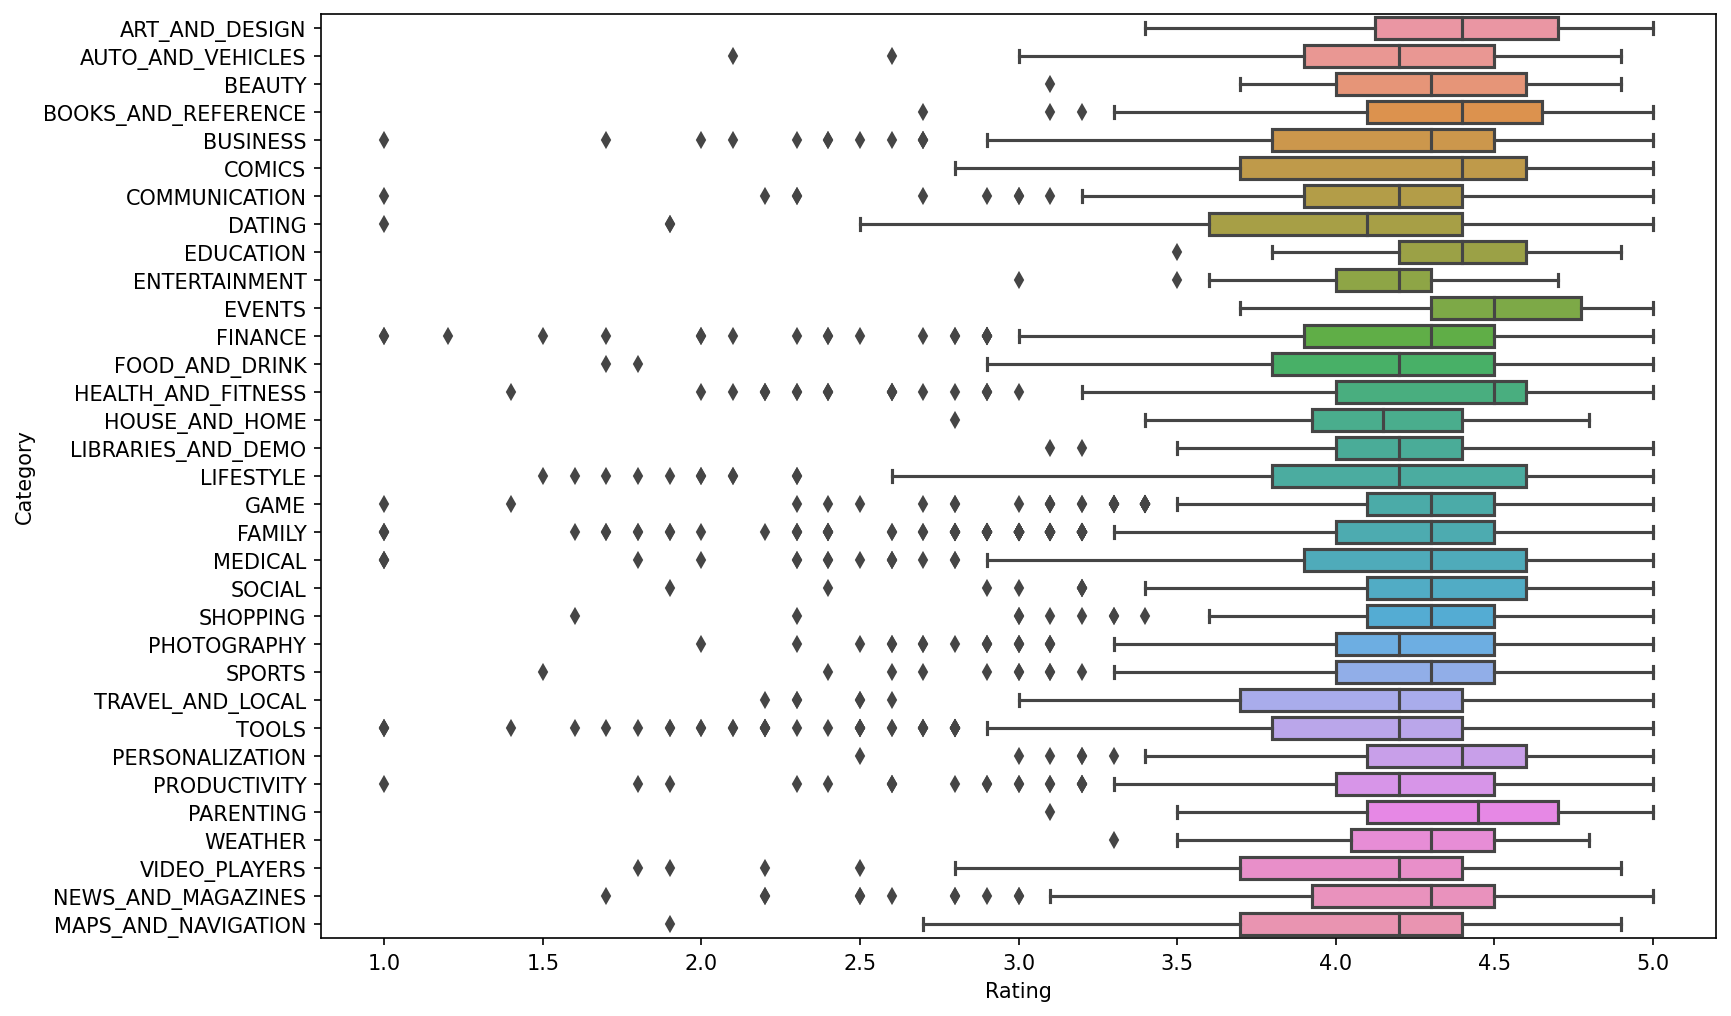

In [53]:
# seems like the Art and Design category has the highest overall rating, followed by Health and Fitness
plt.figure(figsize=(12,8), dpi=150)
sns.boxplot(data=df, y='Category', x='Rating')
plt.show()

In [54]:
# app types in Google play store
df['Type'].value_counts()

Type
Free    6872
Paid     545
Name: count, dtype: int64

In [56]:
# 92.65% of Google Play Store apps are free
100*(df['Type'].value_counts()/len(df))

Type
Free    92.652016
Paid     7.347984
Name: count, dtype: float64

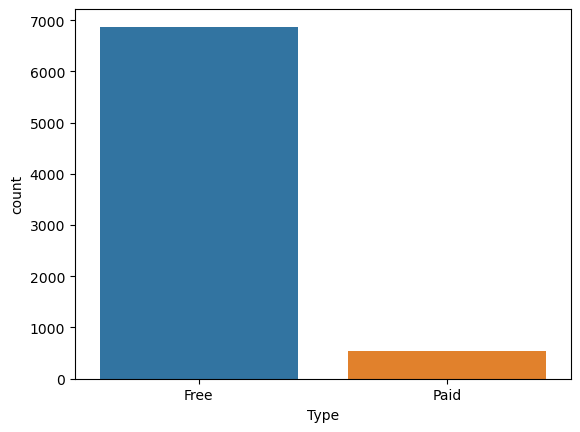

In [57]:
sns.countplot(data=df, x='Type')
plt.show()

In [58]:
# Content Rating
df['Content Rating'].value_counts()

Content Rating
Everyone           5951
Teen                832
Mature 17+          332
Everyone 10+        299
Adults only 18+       2
Unrated               1
Name: count, dtype: int64

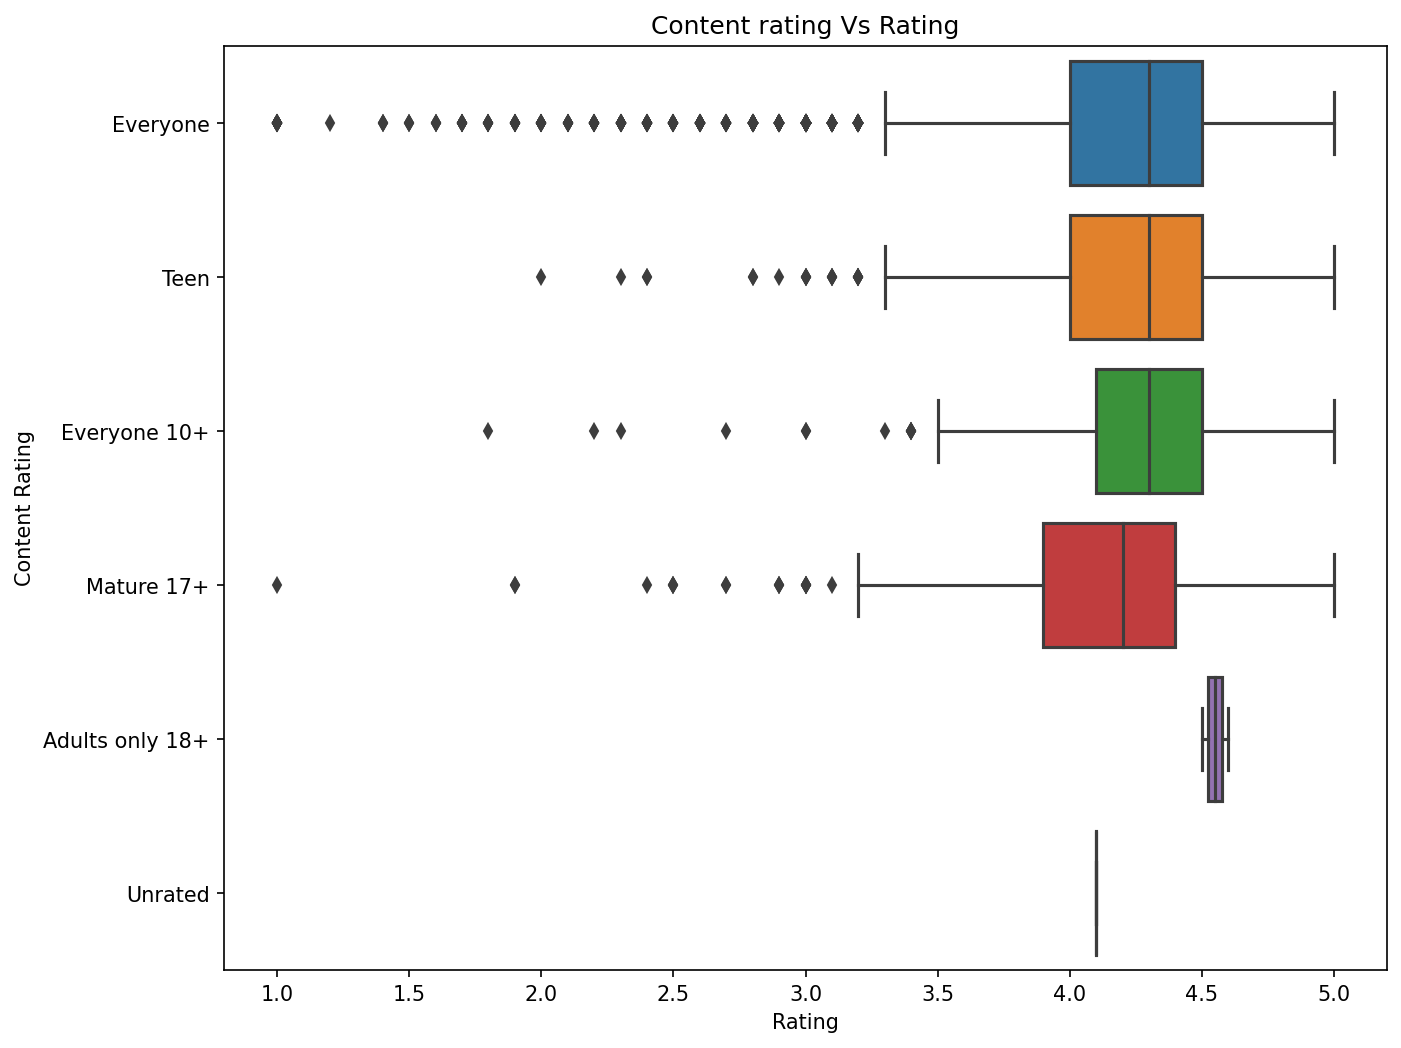

In [59]:
# examine the relationship between Rating and Content rating
# It is observed that Adults Only 18+ has the highest rating
plt.figure(figsize=(10,8), dpi=150)
sns.boxplot(data=df, y='Content Rating', x='Rating')
plt.title('Content rating Vs Rating')
plt.show()

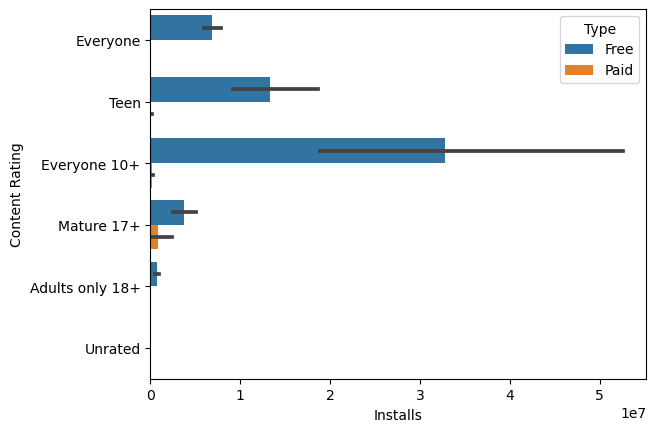

In [60]:
# Seems like Mature 17+ has the highest paid content, followed by Everyone 10+
sns.barplot(data=df, x='Installs', y='Content Rating', hue='Type', orient='h')
plt.show()

In [61]:
df['Genres'].value_counts()

Genres
Tools                     632
Entertainment             428
Education                 404
Action                    318
Personalization           277
                         ... 
Card;Brain Games            1
Lifestyle;Pretend Play      1
Education;Brain Games       1
Comics;Creativity           1
Strategy;Creativity         1
Name: count, Length: 112, dtype: int64

In [62]:
df['Current Ver'].value_counts()

Current Ver
1.0        451
1.1        190
1.2        126
1.3        117
2.0        116
          ... 
12.1.0       1
1.7.9        1
5.0.44       1
v1.39.3      1
0.3.4        1
Name: count, Length: 2519, dtype: int64

In [59]:
df['Android Ver'].value_counts()

Android Ver
4.1 and up            1864
4.0.3 and up          1153
4.0 and up            1071
4.4 and up             730
2.3 and up             558
5.0 and up             446
4.2 and up             310
2.3.3 and up           233
3.0 and up             207
2.2 and up             201
4.3 and up             187
2.1 and up             112
1.6 and up              87
Varies with device      53
6.0 and up              43
7.0 and up              39
3.2 and up              31
2.0 and up              27
5.1 and up              15
1.5 and up              14
3.1 and up               8
2.0.1 and up             7
4.4W and up              5
8.0 and up               5
5.0 - 8.0                2
4.0.3 - 7.1.1            2
7.1 and up               2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

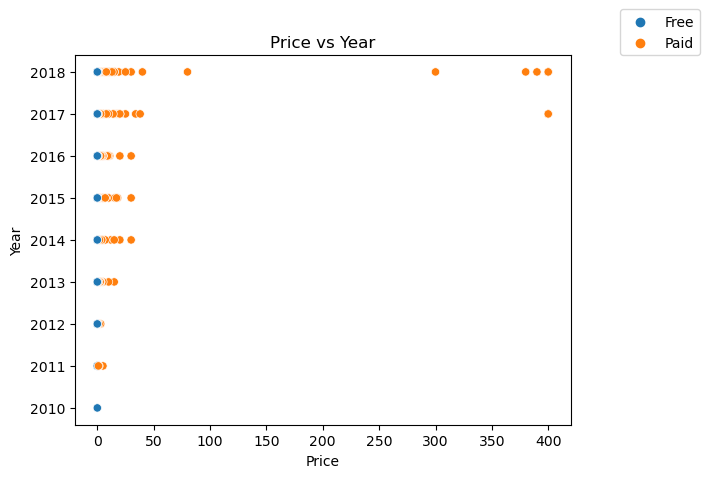

In [63]:
# As the Year goes by there are more and more paid apps
sns.scatterplot(data=df, x='Price', y='Year', hue='Type')
plt.legend(loc=(1.1,1.0))
plt.title('Price vs Year')
plt.show()

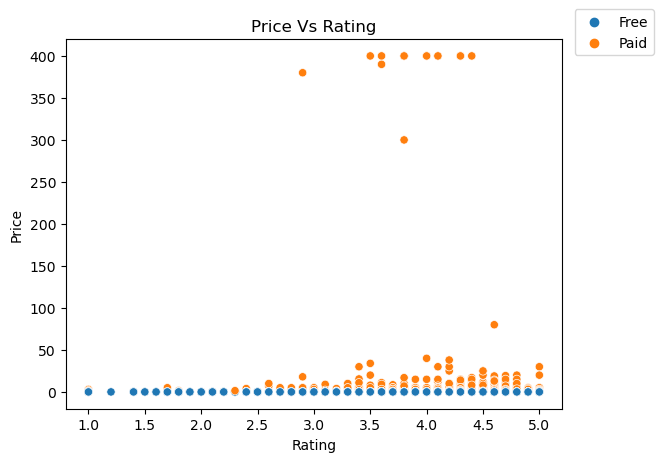

In [64]:
# it is observed that Apps with Rating > 4 are mostly paid
sns.scatterplot(data=df, x='Rating', y='Price', hue='Type')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.title('Price Vs Rating')
plt.show()

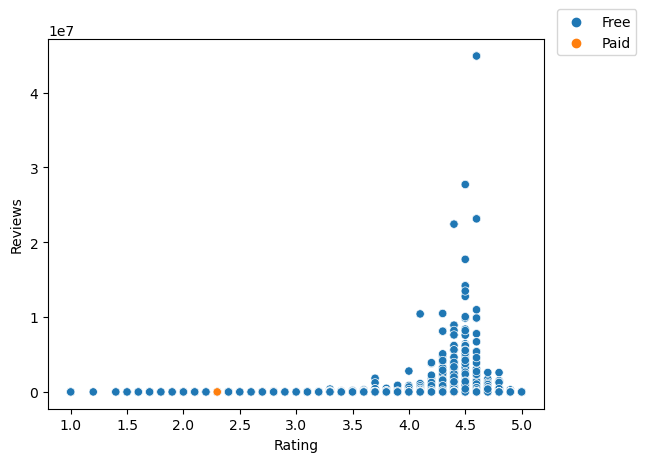

In [65]:
sns.scatterplot(data=df, x='Rating', y='Reviews', hue='Type')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

In [66]:
# App names is not useful in prediction
# Genres is the same as Category column
# to drop unimportant variable for predictive modelling
df = df.drop(['App', 'Genres','Current Ver','Android Ver'], axis=1)

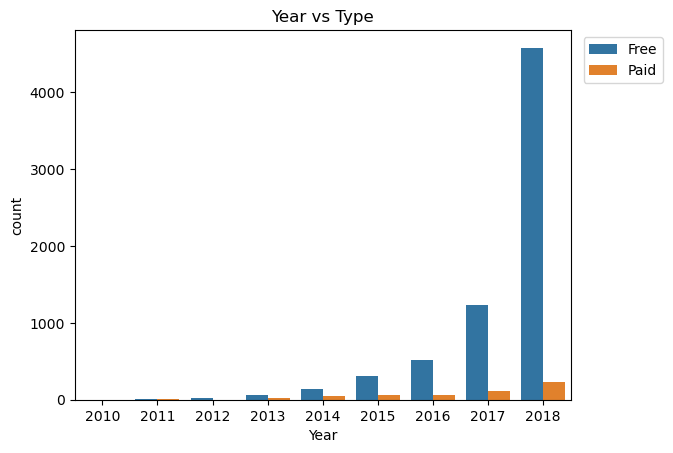

In [67]:
sns.countplot(data=df, x='Year',hue='Type')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Year vs Type')
plt.show()

In [68]:
# to import train test split
from sklearn.model_selection import train_test_split

In [69]:
# to observe correlation of all numeric variables
df.select_dtypes(['int',float]).corr()

,Rating,Reviews,Size,Installs,Price,Month,Year
Rating,1.000000,0.080457,0.082102,0.054350,-0.021941,0.009070,0.128592
Reviews,0.080457,1.000000,0.240063,0.632033,-0.010016,0.028943,0.079881
Size,0.082102,0.240063,1.000000,0.166999,-0.026836,0.044175,0.224223
Installs,0.054350,0.632033,0.166999,1.000000,-0.010626,0.030541,0.079366
Price,-0.021941,-0.010016,-0.026836,-0.010626,1.000000,-0.000568,0.003293
Month,0.009070,0.028943,0.044175,0.030541,-0.000568,1.000000,-0.192456
Year,0.128592,0.079881,0.224223,0.079366,0.003293,-0.192456,1.000000


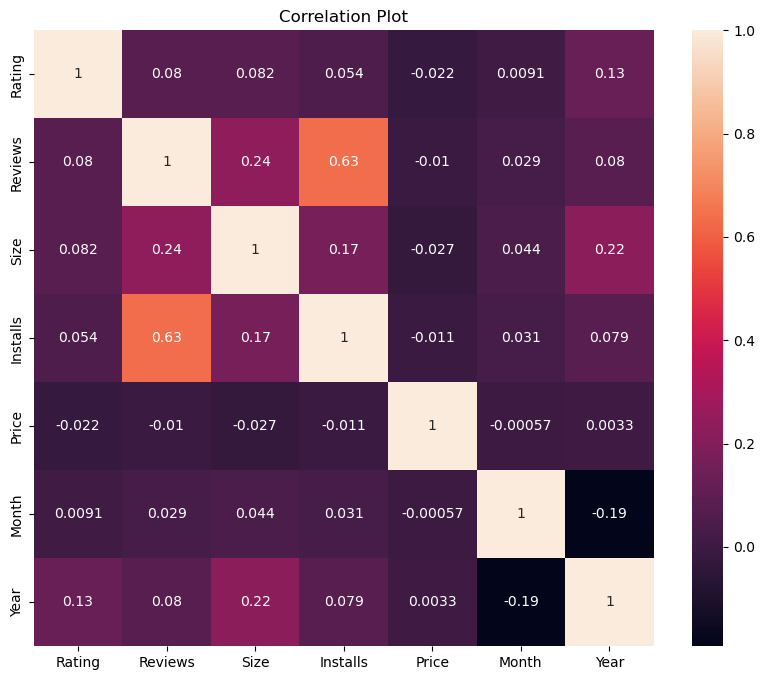

In [70]:
plt.figure(figsize=(10,8), dpi=100)
sns.heatmap(df.select_dtypes(['int',float]).corr(), annot=True)
plt.title('Correlation Plot');

In [71]:
# to view all correlations against the target variable 'Rating'
df.select_dtypes(['int',float]).corr()['Rating']

Rating      1.000000
Reviews     0.080457
Size        0.082102
Installs    0.054350
Price      -0.021941
Month       0.009070
Year        0.128592
Name: Rating, dtype: float64

In [72]:
# Predictive Modelling
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Month,Year
0,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,1,2018
1,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,1,2018
2,ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,8,2018
3,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,6,2018
4,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,6,2018


In [73]:
# to define X and y
X = df.drop('Rating', axis=1)

In [95]:
# to convert 'object' variables in dummie variables before analysis
X = pd.get_dummies(X, drop_first=True)

In [96]:
y = df['Rating']

In [97]:
X

,Reviews,Size,Installs,Price,Month,Year,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159.0,19.000,10000,0.0,1,2018,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,967.0,14.000,500000,0.0,1,2018,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,87510.0,8.700,5000000,0.0,8,2018,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,215644.0,25.000,50000000,0.0,6,2018,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,967.0,2.800,100000,0.0,6,2018,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,44.0,0.619,1000,0.0,3,2014,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
10834,7.0,2.600,500,0.0,6,2017,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10836,38.0,53.000,5000,0.0,7,2017,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10837,4.0,3.600,100,0.0,7,2018,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
# testing data= 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [80]:
scaler = StandardScaler()

In [81]:
scaled_X_train = scaler.fit_transform(X_train)

In [82]:
scaled_X_test = scaler.transform(X_test)

In [83]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [84]:
rf = RandomForestRegressor()

In [85]:
# to fit the training data to Rf regressor
rf.fit(scaled_X_train,y_train)

RandomForestRegressor()

In [86]:
rf_pred = rf.predict(scaled_X_test)

In [87]:
# to print the first 10 predictions of the Random forest regressor model
rf_pred [:10]

array([4.369, 3.848, 4.029, 4.001, 4.006, 3.986, 4.027, 4.053, 4.158,
       4.161])

In [88]:
# performance metrics, to calculate the absolute errors
errors = abs(rf_pred - y_test)

In [89]:
# Calculate mean absolute percentage error (MAPE), determine performance metrics
mape = 100 * (errors / y_test)

In [90]:
# Calculate and display accuracy
# the accuracy rate of Random Forest regressor model = 90.45%
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.34 %.


In [101]:
from xgboost import XGBRegressor

In [102]:
xg = XGBRegressor()

In [103]:
# to fit the model to training data
xg.fit(scaled_X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [104]:
# to do predictions on the X test data
xg_pred = xg.predict(scaled_X_test)

In [105]:
# to print first 10 predictions of the XGBoost regressor model
xg_pred[:10]

array([4.374653 , 3.7755291, 4.0630193, 3.9821644, 3.7469103, 3.9650936,
       4.179029 , 4.2294183, 4.253338 , 4.0845747], dtype=float32)

In [93]:
# evaluate performance metrics, to calculate abs error on XG boost regressor model

In [107]:
xg_errors = abs(xg_pred - y_test)

In [108]:
# Calculate mean absolute percentage error (MAPE), determine performance metrics
xg_mape = 100 * (xg_errors / y_test)

In [109]:
# Calculate and display accuracy
# the accuracy rate of the XGBoost regressor model = 90.05%
accuracy = 100 - np.mean(xg_mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.05 %.


In [110]:
# to build Ada Boost regressor model
ada = AdaBoostRegressor()

In [111]:
# to fit the AdaBoostRegressor model to training data
ada.fit(scaled_X_train,y_train)

AdaBoostRegressor()

In [112]:
# predictions of the X test data
ada_pred = ada.predict(scaled_X_test)

In [113]:
# to print first 10 predictions of the AdaBoost model
ada_pred[:10]

array([4.41400862, 4.22561538, 4.15967016, 4.10711974, 4.15967016,
       3.79559665, 4.22561538, 3.79559665, 3.69941957, 4.35335366])

In [114]:
# performance metrics, to calculate the absolute errors
ada_errors = abs(ada_pred - y_test)

In [115]:
# Calculate mean absolute percentage error (MAPE), determine performance metrics
ada_mape = 100 * (ada_errors / y_test)

In [116]:
# the accuracy rate of AdaBoost regressor model = 88.91%
accuracy = 100 - np.mean(ada_mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.91 %.


In [117]:
# to build the Gradient Boost regressor model
gb = GradientBoostingRegressor()

In [118]:
# to fit the gradient boost regressor model to training data
gb.fit(scaled_X_train,y_train)

GradientBoostingRegressor()

In [119]:
# to do prediction on the X test data
gb_pred = gb.predict(scaled_X_test)

In [120]:
# to print first 10 predictions of the Gradient Boost regressor model
gb_pred[:10]

array([4.38712273, 4.27064384, 4.12193797, 4.05547034, 4.10805898,
       3.9878248 , 4.14652368, 4.11257228, 4.15740737, 4.15291712])

In [121]:
# performance metrics, to calculate the absolute errors
gb_errors = abs(gb_pred - y_test)

In [122]:
# Calculate mean absolute percentage error (MAPE), determine performance metrics
gb_mape = 100 * (gb_errors / y_test)

In [123]:
# the accuracy rate of Gradient Boost Regressor model = 90.1%
accuracy = 100 - np.mean(gb_mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.1 %.


In [125]:
from sklearn.tree import DecisionTreeRegressor

In [126]:
# to build the Decision Tree regression model
dt = DecisionTreeRegressor()

In [127]:
# to fit the decision tree model to training data
dt.fit(scaled_X_train,y_train)

DecisionTreeRegressor()

In [128]:
# to do prediction on the X test data
dt_pred = dt.predict(scaled_X_test)

In [129]:
# to print first 10 predictions of the decision tree regression model
dt_pred[:10]

array([4.3, 3.6, 3.8, 4.2, 4.1, 4. , 3.6, 4.8, 3.7, 4.1])

In [130]:
# performance metrics, to calculate the absolute errors
dt_errors = abs(dt_pred - y_test)

In [131]:
# Calculate mean absolute percentage error (MAPE), determine performance metrics
dt_mape = 100 * (dt_errors / y_test)

In [132]:
# the accuracy rate of Decision Tree regressor model = 87.79%
accuracy = 100 - np.mean(dt_mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.79 %.


In [251]:
# Random Forest regressor has the highest accuracy rate = 90.45%
rf.feature_importances_

array([2.64128006e-01, 1.89913096e-01, 1.02645475e-01, 1.97991003e-02,
       1.11298892e-01, 5.11959000e-02, 5.79043228e-03, 1.37815377e-03,
       4.77971211e-03, 1.14568081e-02, 5.59265366e-03, 6.74365425e-03,
       9.59525350e-03, 1.24709874e-03, 1.14057741e-03, 1.19144600e-03,
       1.97737542e-02, 1.33974158e-02, 6.69059252e-03, 9.69219103e-03,
       1.30821389e-02, 1.08483770e-03, 1.06845103e-03, 1.54113070e-02,
       6.86452163e-03, 1.47030081e-02, 8.04685221e-03, 1.21013654e-03,
       6.18319758e-03, 6.53843969e-03, 8.16601735e-03, 2.50884598e-03,
       3.38180918e-03, 1.11168562e-02, 1.83695818e-02, 7.28766751e-03,
       5.01827070e-03, 1.25665773e-03, 4.43749390e-03, 8.08211938e-03,
       5.50567326e-03, 6.49854131e-03, 6.72518089e-03, 2.18207737e-06])

In [252]:
pd.DataFrame(data = rf.feature_importances_, index=X.columns, columns=['Importance'])

,Importance
Reviews,0.264128
Size,0.189913
Installs,0.102645
Price,0.019799
Month,0.111299
Year,0.051196
Category_AUTO_AND_VEHICLES,0.005790
Category_BEAUTY,0.001378
Category_BOOKS_AND_REFERENCE,0.004780
Category_BUSINESS,0.011457


In [265]:
rf_imp = pd.DataFrame(data = rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance',ascending=False)

In [266]:
rf_imp

,Importance
Reviews,0.264128
Size,0.189913
Month,0.111299
Installs,0.102645
Year,0.051196
Price,0.019799
Category_FAMILY,0.019774
Category_TOOLS,0.018370
Category_LIFESTYLE,0.015411
Category_MEDICAL,0.014703


In [273]:
# to filter out Importance less than 0.007
rf_imp = rf_imp[rf_imp['Importance'] > 0.007]

In [274]:
rf_imp

,Importance
Reviews,0.264128
Size,0.189913
Month,0.111299
Installs,0.102645
Year,0.051196
Price,0.019799
Category_FAMILY,0.019774
Category_TOOLS,0.018370
Category_LIFESTYLE,0.015411
Category_MEDICAL,0.014703


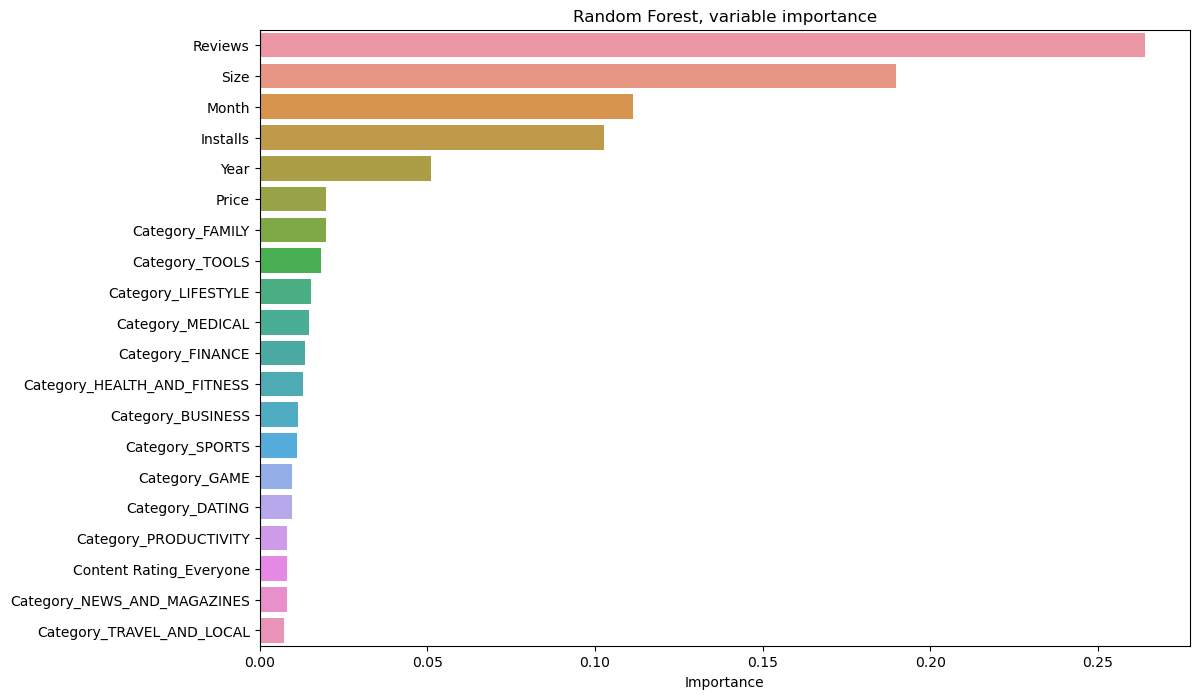

In [275]:
# to visualise Random Forest variable importance in a barplot
# Top 3 predictors of 'Rating' are 'Reviews','Size','Month' of downloads
plt.figure(figsize=(12,8), dpi=100)
sns.barplot(data=rf_imp, x='Importance', y=rf_imp.index)
plt.title('Random Forest, variable importance');